In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]


In [2]:
def gaussian_sample(mean, variance):
    return np.random.normal(mean, variance**0.5)

def gaussian(x, mu, var):
    return np.exp(-1.0*(x-mu)**2/(2.0*var)) / np.sqrt(2.0*np.pi*var)

class Point():
    def __init__(self, gaussian):
        
        if np.random.random() > 0.5: 
            self.value = gaussian_sample(5, 1)
        else:
            self.value = gaussian_sample(-5, 1)
        
        temp = np.random.random()
        self.p = [temp, 1-temp]
    
    def __str__(self): 
        out = "Point({}, p1: {})".format(self.value, self.p)
        return out 
    
    def __repr__(self):
        out = "Point({}, p1: {})".format(self.value, self.p)
        return out 

In [3]:
def generate_realizations(how_many):
    points = []
    for i in range(how_many):
        points.append(Point(0))
        
        
    return points

In [4]:
def update_mu(points, idx):
    numer = denom = 0
    for point in points:
        numer += (point.p[idx] * point.value) 
        denom += (point.p[idx])
    return numer/denom


def update_var(points, mu, idx):
    numer = denom = 0
    for point in points: 
        numer += (point.p[idx] * (point.value-mu)**2)
        denom += (point.p[idx])
    return numer/denom


def update_w(points):
    total = 0
    for point in points:
        total += point.p[0]
    return total/500.0

def update_posteriors(points, mu1, var1, mu2, var2, w):
    for point in points: 
        p1i = point.p[0] * gaussian(point.value, mu1, var1)
        p2i = point.p[1] * gaussian(point.value, mu2, var2)

#         p1i = w * gaussian(point.value, mu1, var1)
#         p2i = (1-w) * gaussian(point.value, mu2, var2)

        point.p[0] = p1i / (p1i + p2i)
        point.p[1] = p2i / (p1i + p2i)


In [5]:
def log_likelihood(points, idx, mu, var):
    s = 0
    s1 = 0
    s2 = -0.5 * len(points) * np.log(2*np.pi*var)
    for p in points: 
        s += np.log(p.p[idx])
        s1 += (p.value - mu)**2 / (2 * var)
        
    return s2 - s1

def plot_loglike(loglike1, loglike2):
    x = list(range(len(loglike1)))
    
    s = []
    for i in range(len(loglike1)):
        s.append(loglike1[i] + loglike2[i])
        
    plt.plot(x, loglike1, x, loglike2, x, s)


5.00975734441 0.992662170968
-5.1075219642 0.975993336174
0.466


/home/rshn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


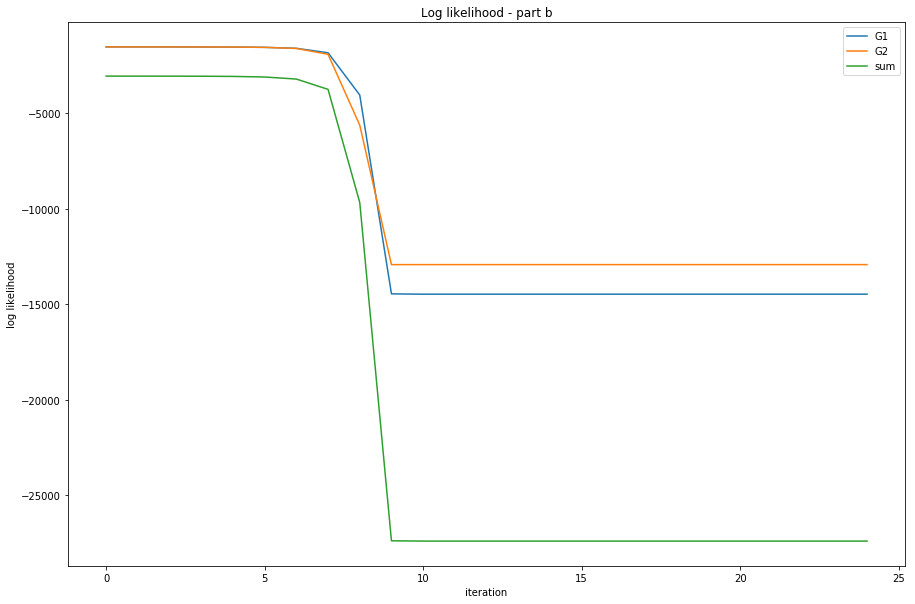

In [6]:
# part B 

mu1 = mu2 = var2 = var2 = w = 0
loglike1 = []
loglike2 = []

points = generate_realizations(500)

for i in range(25):
    mu1 = update_mu(points, 0)
    mu2 = update_mu(points, 1)
    var1 = update_var(points, mu1, 0)
    var2 = update_var(points, mu2, 1)
    w = update_w(points)
        
    update_posteriors(points, mu1, var1, mu2, var2, w)
        
    loglike1.append(log_likelihood(points, 0, mu1, var1))
    loglike2.append(log_likelihood(points, 1, mu2, var2))

    
print(mu1, var1)
print(mu2, var2)
print(w)
plot_loglike(loglike1, loglike2)
plt.title('Log likelihood - part b'); plt.xlabel('iteration'); plt.ylabel('log likelihood'); 
plt.legend(['G1', 'G2', 'sum'])

4.94669695479 1
-5.0166677466 1
0.516


/home/rshn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


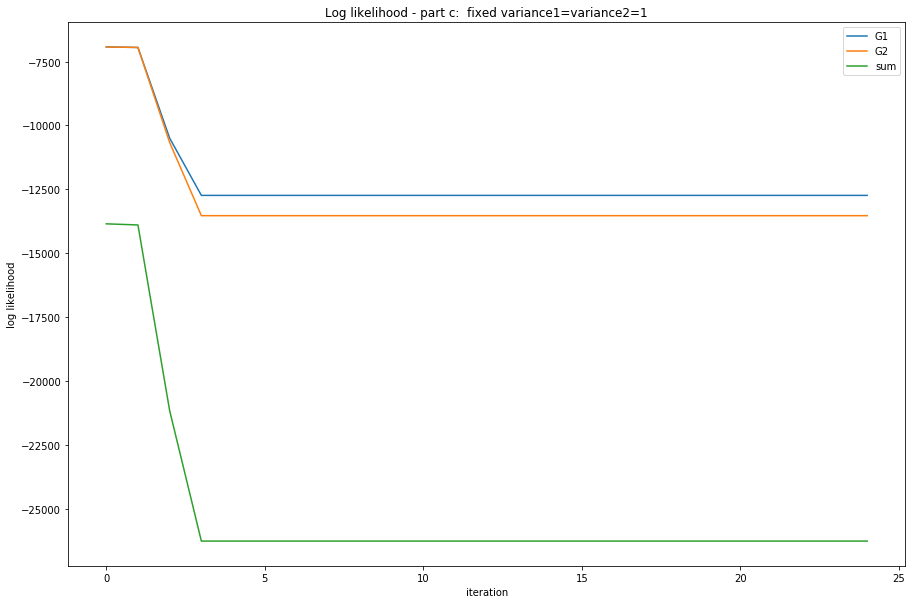

In [7]:
# part C 

mu1 = mu2 = var2 = var2 = w = 0
loglike1 = []
loglike2 = []

points = generate_realizations(500)

for i in range(25):
    mu1 = update_mu(points, 0)
    mu2 = update_mu(points, 1)
    var1 = 1
    var2 = 1
    w = update_w(points)
        
    update_posteriors(points, mu1, var1, mu2, var2, w)
        
    loglike1.append(log_likelihood(points, 0, mu1, var1))
    loglike2.append(log_likelihood(points, 1, mu2, var2))

    
print(mu1, var1)
print(mu2, var2)
print(w)
plot_loglike(loglike1, loglike2)
plt.title('Log likelihood - part c:  fixed variance1=variance2=1'); plt.xlabel('iteration'); plt.ylabel('log likelihood');
plt.legend(['G1', 'G2', 'sum'])

5 1.04515876372
-5 1.05101286959
0.5


/home/rshn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


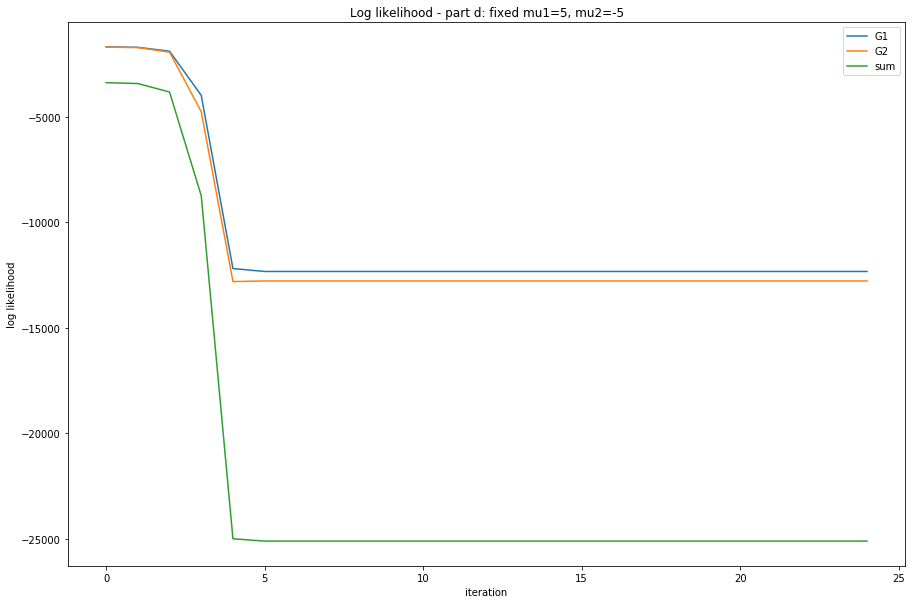

In [8]:
# part D 

mu1 = mu2 = var2 = var2 = w = 0
loglike1 = []
loglike2 = []

points = generate_realizations(500)

for i in range(25):
    mu1 = 5
    mu2 = -5
    var1 = update_var(points, mu1, 0)
    var2 = update_var(points, mu2, 1)
    w = update_w(points)
        
    update_posteriors(points, mu1, var1, mu2, var2, w)
        
    loglike1.append(log_likelihood(points, 0, mu1, var1))
    loglike2.append(log_likelihood(points, 1, mu2, var2))

    
print(mu1, var1)
print(mu2, var2)
print(w)
plot_loglike(loglike1, loglike2)
plt.title('Log likelihood - part d: fixed mu1=5, mu2=-5'); plt.xlabel('iteration'); plt.ylabel('log likelihood');
plt.legend(['G1', 'G2', 'sum'])

/home/rshn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


5 0.699892861497
0 26.8066270442
0.454


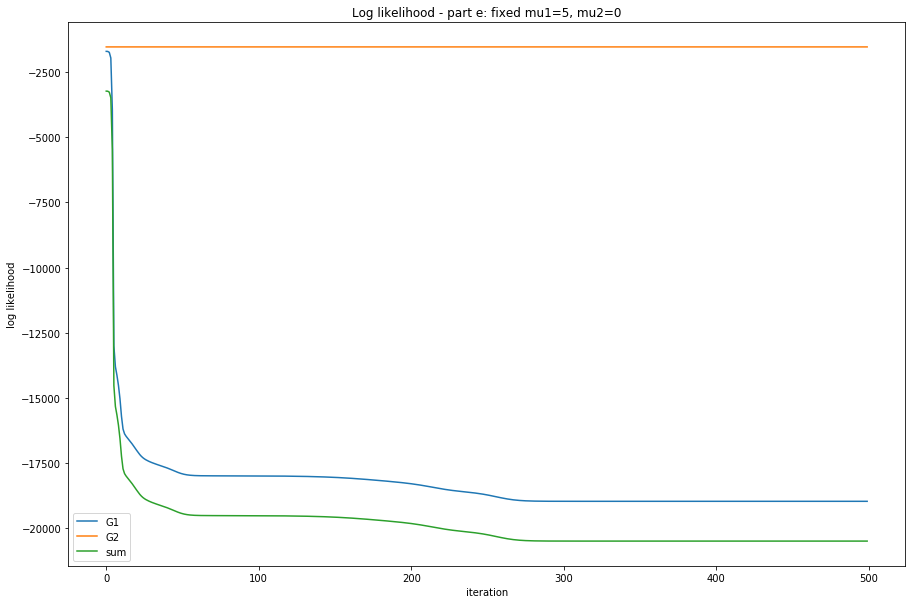

In [9]:
# part E 

mu1 = mu2 = var2 = var2 = w = 0
loglike1 = []
loglike2 = []

points = generate_realizations(500)

for i in range(500):
    mu1 = 5
    mu2 = 0
    var1 = update_var(points, mu1, 0)
    var2 = update_var(points, mu2, 1)
    w = update_w(points)
        
    update_posteriors(points, mu1, var1, mu2, var2, w)
        
    loglike1.append(log_likelihood(points, 0, mu1, var1))
    loglike2.append(log_likelihood(points, 1, mu2, var2))

    
print(mu1, var1)
print(mu2, var2)
print(w)
plot_loglike(loglike1, loglike2)
plt.title('Log likelihood - part e: fixed mu1=5, mu2=0'); plt.xlabel('iteration'); plt.ylabel('log likelihood');
plt.legend(['G1', 'G2', 'sum'])